<a href="https://colab.research.google.com/github/JeanFirmino/Estudo-com-os-dados-pluviom-tricos-de-Pernambuco/blob/main/APLICACAO_DE_MACHINE_LEARNING_PARA_A_PREVISAO_DOS_DADOS_DE_PRECIPITACAO_PLUVIOMETRICA_MENSAL_NO_ESTADO_DE_PERNAMBUCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Para o trabalho, teve como meta principal buscar a relação entre a longitude em relação ao litoral e a sua possível
# influência com os dados os registros de chuva acumuladas para um determinado mês, foi suposto inicialmente 
# que quanto mais próximo do litoral, maior será o volume de chuvas acumulado para o determinado mês.
# Para melhor viabilizar essa busca, foi selecionado apenas um mês ao ano de todos os postos, os mesmos vão ser 
# comparados entre postos e suas longitudes.
# Para a aplicação do raciocínio, foi usado o algoritmo de "árvore de decisão"

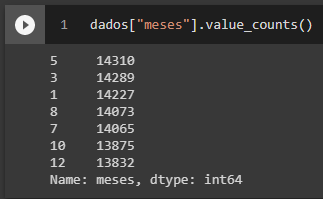

Pela pré-análise elaborada antes podemos usar o mês 5, visto que o mesmo possuí um maior volume de dados.

### Analise dos dados de chuva da caatinga

Importando bibliotecas

In [ ]:
# Iniciando as bibliotecas usadas para montar um sistema de aprendizado de máquina chamado árvore de descisão
# No qual tem como objetivo criar um "raciocínio" das informações de saída e entrada e fornecer um método no qual seja possivel prever informações 
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
origem = 'drive/My Drive/Artigo_dados_de_Pernambuco/pernambucomaio.csv'
planilha = pd.read_csv(origem, sep=',')
plt.style.use('classic')

In [ ]:
planilha.head()

,codigos,latitude,longitude,meses,ano,dia1,dia2,dia3,dia4,dia5,dia6,dia7,dia8,dia9,dia10,dia11,dia12,dia13,dia14,dia15,dia16,dia17,dia18,dia19,dia20,dia21,dia22,dia23,dia24,dia25,dia26,dia27,dia28,dia29,dia30,dia31,media_mensal,maxima_mensal,minima_mensal,acumulado_do_mes
0,198,-7.911,-34.902,5,2018,0.0,0.0,9.0,10.0,5.0,7.2,16.0,1.4,0.2,3.5,3.2,15.0,4.9,0.0,0.0,4.0,4.5,1.3,2.7,0.0,0.0,0.6,4.0,4.2,10.0,1.3,0.0,5.1,1.2,6.7,38.5,5.145161,38.5,0.0,159.5
1,198,-7.911,-34.902,5,2017,4.7,0.0,36.7,4.4,0.0,0.7,26.2,20.7,27.3,0.0,0.4,1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4,26.0,5.9,0.0,0.0,9.5,10.5,0.5,10.1,32.5,4.9,30.2,8.200000,36.7,0.0,254.2
2,198,-7.911,-34.902,5,2016,5.8,27.6,5.3,0.9,2.7,6.3,20.6,0.2,68.0,126.0,10.8,5.7,0.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.8,29.0,10.2,0.1,0.0,7.2,142.0,16.5,15.864516,142.0,0.0,491.8
3,198,-7.911,-34.902,5,2015,0.0,0.0,1.2,1.8,0.8,1.6,0.0,0.0,2.1,0.0,0.3,0.0,0.0,5.9,1.4,0.0,23.3,0.1,12.7,0.5,4.9,5.3,1.3,3.7,0.6,1.8,1.9,14.4,1.3,23.0,16.4,4.074194,23.3,0.0,126.3
4,198,-7.911,-34.902,5,2014,NaN,NaN,NaN,NaN,NaN,2.7,7.1,0.0,0.8,0.0,0.0,0.1,4.2,20.7,9.9,0.5,2.2,2.0,0.8,0.0,18.0,6.1,14.1,0.4,0.0,0.0,1.8,11.8,8.9,0.2,0.0,4.319231,20.7,0.0,112.3


In [ ]:
dados = planilha.dropna(axis=0, how='any') # Remover qualquer linhas que possua NaN (células vazias)

In [ ]:
dados.head()

,codigos,latitude,longitude,meses,ano,dia1,dia2,dia3,dia4,dia5,dia6,dia7,dia8,dia9,dia10,dia11,dia12,dia13,dia14,dia15,dia16,dia17,dia18,dia19,dia20,dia21,dia22,dia23,dia24,dia25,dia26,dia27,dia28,dia29,dia30,dia31,media_mensal,maxima_mensal,minima_mensal,acumulado_do_mes
0,198,-7.911,-34.902,5,2018,0.0,0.0,9.0,10.0,5.0,7.2,16.0,1.4,0.2,3.5,3.2,15.0,4.9,0.0,0.0,4.0,4.5,1.3,2.7,0.0,0.0,0.6,4.0,4.2,10.0,1.3,0.0,5.1,1.2,6.7,38.5,5.145161,38.5,0.0,159.5
1,198,-7.911,-34.902,5,2017,4.7,0.0,36.7,4.4,0.0,0.7,26.2,20.7,27.3,0.0,0.4,1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4,26.0,5.9,0.0,0.0,9.5,10.5,0.5,10.1,32.5,4.9,30.2,8.200000,36.7,0.0,254.2
2,198,-7.911,-34.902,5,2016,5.8,27.6,5.3,0.9,2.7,6.3,20.6,0.2,68.0,126.0,10.8,5.7,0.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.8,29.0,10.2,0.1,0.0,7.2,142.0,16.5,15.864516,142.0,0.0,491.8
3,198,-7.911,-34.902,5,2015,0.0,0.0,1.2,1.8,0.8,1.6,0.0,0.0,2.1,0.0,0.3,0.0,0.0,5.9,1.4,0.0,23.3,0.1,12.7,0.5,4.9,5.3,1.3,3.7,0.6,1.8,1.9,14.4,1.3,23.0,16.4,4.074194,23.3,0.0,126.3
5,198,-7.911,-34.902,5,2013,42.7,4.8,0.0,0.0,0.0,1.2,0.0,3.0,0.0,4.7,22.5,1.1,3.3,2.7,0.5,6.2,38.5,15.0,0.0,0.5,3.7,0.0,0.0,6.9,1.2,0.0,9.2,42.0,26.0,15.5,1.4,8.148387,42.7,0.0,252.6


In [ ]:
dados.shape

(14310, 40)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14310 entries, 0 to 15642
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   codigos           14310 non-null  int64  
 1   latitude          14310 non-null  float64
 2   longitude         14310 non-null  float64
 3   meses             14310 non-null  int64  
 4   ano               14310 non-null  int64  
 5   dia1              14310 non-null  float64
 6   dia2              14310 non-null  float64
 7   dia3              14310 non-null  float64
 8   dia4              14310 non-null  float64
 9   dia5              14310 non-null  float64
 10  dia6              14310 non-null  float64
 11  dia7              14310 non-null  float64
 12  dia8              14310 non-null  float64
 13  dia9              14310 non-null  float64
 14  dia10             14310 non-null  float64
 15  dia11             14310 non-null  float64
 16  dia12             14310 non-null  float6

In [ ]:
dados["acumulado_do_mes"].value_counts().sort_index()

0.0       1585
0.1          4
0.2          1
0.3          8
0.4         10
          ... 
840.1        1
850.9        1
888.7        1
891.5        1
1005.6       1
Name: acumulado_do_mes, Length: 3190, dtype: int64

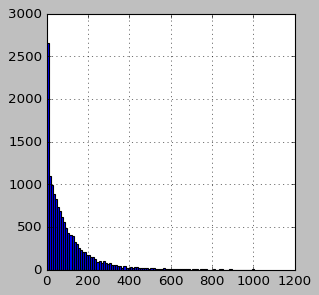

In [ ]:
plt.xlim()
dados["acumulado_do_mes"].hist(bins = 100, figsize = (4,4))

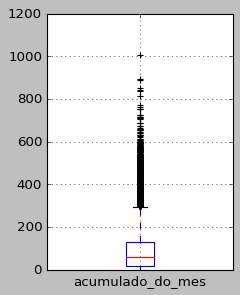

In [ ]:
dados.boxplot(figsize=(3, 4),column=['acumulado_do_mes'])

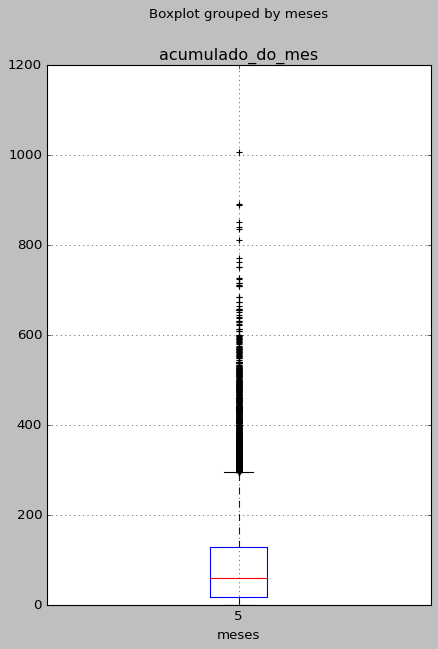

In [ ]:
dados.boxplot(figsize=(6, 9),column=['acumulado_do_mes'],by = 'meses')

In [ ]:
def plot_series(time, series, format="-", start=0, end=None, label = None):
    plt.plot(time[start:end], series[start:end], format, label = label)
    plt.xticks(fontsize = 16)
    plt.legend()
    plt.xlabel("Time")
    plt.yticks(fontsize = 16)
    plt.ylabel("Value")
    plt.grid(True)    

No handles with labels found to put in legend.


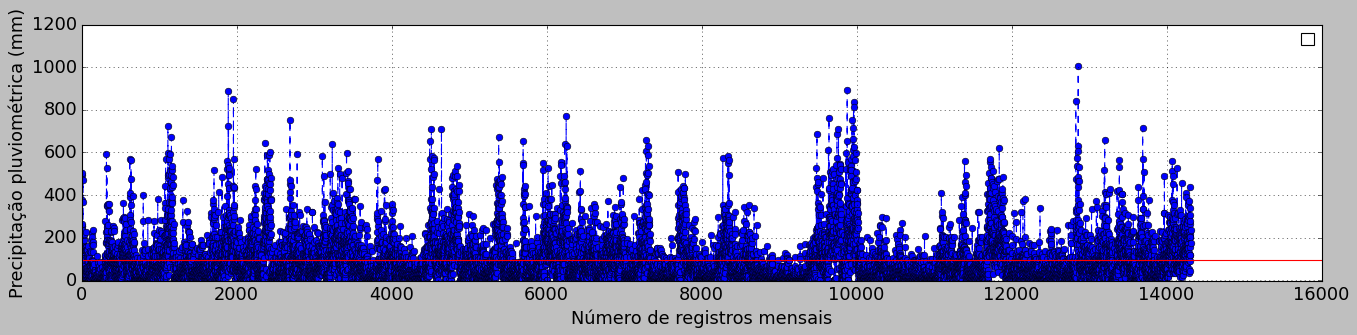

In [ ]:
plt.figure(figsize=(20, 4))
plot_series(np.linspace(1,len(dados),len(dados)),dados.acumulado_do_mes,'o--')
plt.xlabel("Número de registros mensais", fontsize = 16)
plt.ylabel("Precipitação pluviométrica (mm)", fontsize = 16)
plt.ylim(-1,)
plt.axhline(y=dados.acumulado_do_mes.mean(), c = 'r')

In [ ]:
dados["acumulado_do_mes"].mean() # média simples

93.1521104122991

In [ ]:
dados["acumulado_do_mes"].std() # Retorna o desvio padrão da amostra sobre o eixo solicitado

105.78499615431299

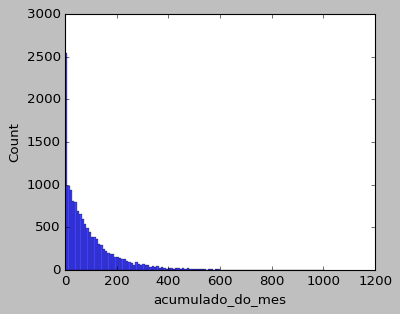

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(dados, x = "acumulado_do_mes")

Aplicando o teste de correlação

In [ ]:
dados.columns.values

array(['codigos', 'latitude', 'longitude', 'meses', 'ano', 'dia1', 'dia2',
       'dia3', 'dia4', 'dia5', 'dia6', 'dia7', 'dia8', 'dia9', 'dia10',
       'dia11', 'dia12', 'dia13', 'dia14', 'dia15', 'dia16', 'dia17',
       'dia18', 'dia19', 'dia20', 'dia21', 'dia22', 'dia23', 'dia24',
       'dia25', 'dia26', 'dia27', 'dia28', 'dia29', 'dia30', 'dia31',
       'media_mensal', 'maxima_mensal', 'minima_mensal',
       'acumulado_do_mes'], dtype=object)

In [ ]:
dadostestes = ['codigos', 'latitude', 'longitude', 'meses', 'ano', 'dia1', 'dia2',
               'dia3', 'dia4', 'dia5', 'dia6', 'dia7', 'dia8', 'dia9', 'dia10',
               'dia11', 'dia12', 'dia13', 'dia14', 'dia15', 'dia16', 'dia17',
               'dia18', 'dia19', 'dia20', 'dia21', 'dia22', 'dia23', 'dia24',
               'dia25', 'dia26', 'dia27', 'dia28', 'dia29', 'dia30', 'dia31',
               'media_mensal', 'maxima_mensal', 'minima_mensal',
               'acumulado_do_mes']
dadostestes = dados[dadostestes]

In [ ]:
correlacao = dadostestes.corr()
correlacao

,codigos,latitude,longitude,meses,ano,dia1,dia2,dia3,dia4,dia5,dia6,dia7,dia8,dia9,dia10,dia11,dia12,dia13,dia14,dia15,dia16,dia17,dia18,dia19,dia20,dia21,dia22,dia23,dia24,dia25,dia26,dia27,dia28,dia29,dia30,dia31,media_mensal,maxima_mensal,minima_mensal,acumulado_do_mes
codigos,1.000000,-0.059946,0.086100,NaN,0.094015,0.036146,0.009964,0.041613,0.020525,0.029080,0.013634,0.007410,-0.003412,0.005730,0.048056,0.021375,0.022400,0.029247,0.019754,-0.009260,0.020602,0.037348,0.022540,0.021598,0.033167,0.001608,0.019108,0.021237,0.028239,0.030458,0.015766,0.007128,0.024198,0.040893,0.050473,0.029568,0.061215,0.047518,-0.003362,0.061215
latitude,-0.059946,1.000000,0.117086,NaN,0.005552,0.041985,0.031901,0.019212,0.042862,0.019469,0.042212,0.034160,0.032685,0.024113,0.041317,0.025803,0.027325,0.009037,0.020910,0.040912,-0.000594,0.032784,0.042778,-0.003962,0.020597,0.039638,0.036875,0.047545,0.023227,0.000954,0.018232,-0.003103,-0.019140,0.008245,0.035364,0.007746,0.063986,0.118415,-0.010404,0.063986
longitude,0.086100,0.117086,1.000000,NaN,0.106897,0.206440,0.183094,0.161198,0.134772,0.127435,0.166352,0.208726,0.181063,0.149253,0.189217,0.208706,0.188236,0.161451,0.183469,0.199379,0.228569,0.249939,0.218046,0.191492,0.197959,0.197367,0.240671,0.238709,0.259538,0.229516,0.216827,0.201951,0.185360,0.229937,0.270277,0.242176,0.530125,0.403808,0.012512,0.530125
meses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ano,0.094015,0.005552,0.106897,NaN,1.000000,0.072480,0.052710,0.039226,0.024690,0.043798,0.080004,0.018678,-0.046312,-0.007296,0.078414,0.005509,-0.009935,0.024148,-0.015799,0.000519,0.002642,0.025303,0.043273,0.009442,0.016302,-0.005326,-0.005579,0.022274,0.034361,0.081157,-0.009337,0.011347,0.046047,0.048318,0.064843,-0.019373,0.069318,0.084661,0.005920,0.069318
dia1,0.036146,0.041985,0.206440,NaN,0.072480,1.000000,0.246893,0.180645,0.104138,0.136646,0.128221,0.105438,0.105753,0.067858,0.101781,0.083522,0.073551,0.051859,0.087557,0.151248,0.121144,0.145368,0.130436,0.078722,0.097176,0.071557,0.071450,0.113468,0.126040,0.064577,0.083450,0.098373,0.078731,0.105542,0.047957,0.040495,0.372891,0.338174,0.003919,0.372891
dia2,0.009964,0.031901,0.183094,NaN,0.052710,0.246893,1.000000,0.234021,0.130765,0.150381,0.112764,0.128440,0.079469,0.133189,0.158005,0.103036,0.094929,0.060327,0.066821,0.124278,0.104730,0.073791,0.098812,0.056930,0.097380,0.038835,0.032233,0.052436,0.134119,0.071413,0.073255,0.094202,0.034046,0.055746,0.153060,0.091255,0.368744,0.339698,0.018462,0.368744
dia3,0.041613,0.019212,0.161198,NaN,0.039226,0.180645,0.234021,1.000000,0.267386,0.341951,0.145428,0.135030,0.125882,0.097178,0.098680,0.106664,0.062728,0.062708,0.082514,0.089216,0.072588,0.041174,0.074122,0.069838,0.213343,0.085043,0.095359,0.074618,0.149635,0.099888,0.060039,0.037700,0.077746,0.150846,0.054213,0.089181,0.405586,0.350299,0.009438,0.405586
dia4,0.020525,0.042862,0.134772,NaN,0.024690,0.104138,0.130765,0.267386,1.000000,0.335969,0.175620,0.088708,0.138059,0.042912,0.064168,0.094192,0.060503,0.066646,0.071694,0.056805,0.072438,0.088800,0.095340,0.070973,0.219164,0.089084,0.079690,0.071439,0.139128,0.069781,0.083630,0.040135,0.050992,0.059632,0.082207,0.078564,0.356730,0.303545,0.003344,0.356730
dia5,0.029080,0.019469,0.127435,NaN,0.043798,0.136646,0.150381,0.341951,0.335969,1.000000,0.259663,0.102868,0.107540,0.042987,0.068670,0.109590,0.050911,0.092041,0.110302,0.071601,0.064893,0.080121,0.101885,0.066331,0.239949,0.083995,0.075713,0.081232,0.168920,0.070512,0.059023,0.035448,0.006962,0.057062,0.083436,0.052518,0.379797,0.305240,0.029363,0.379797


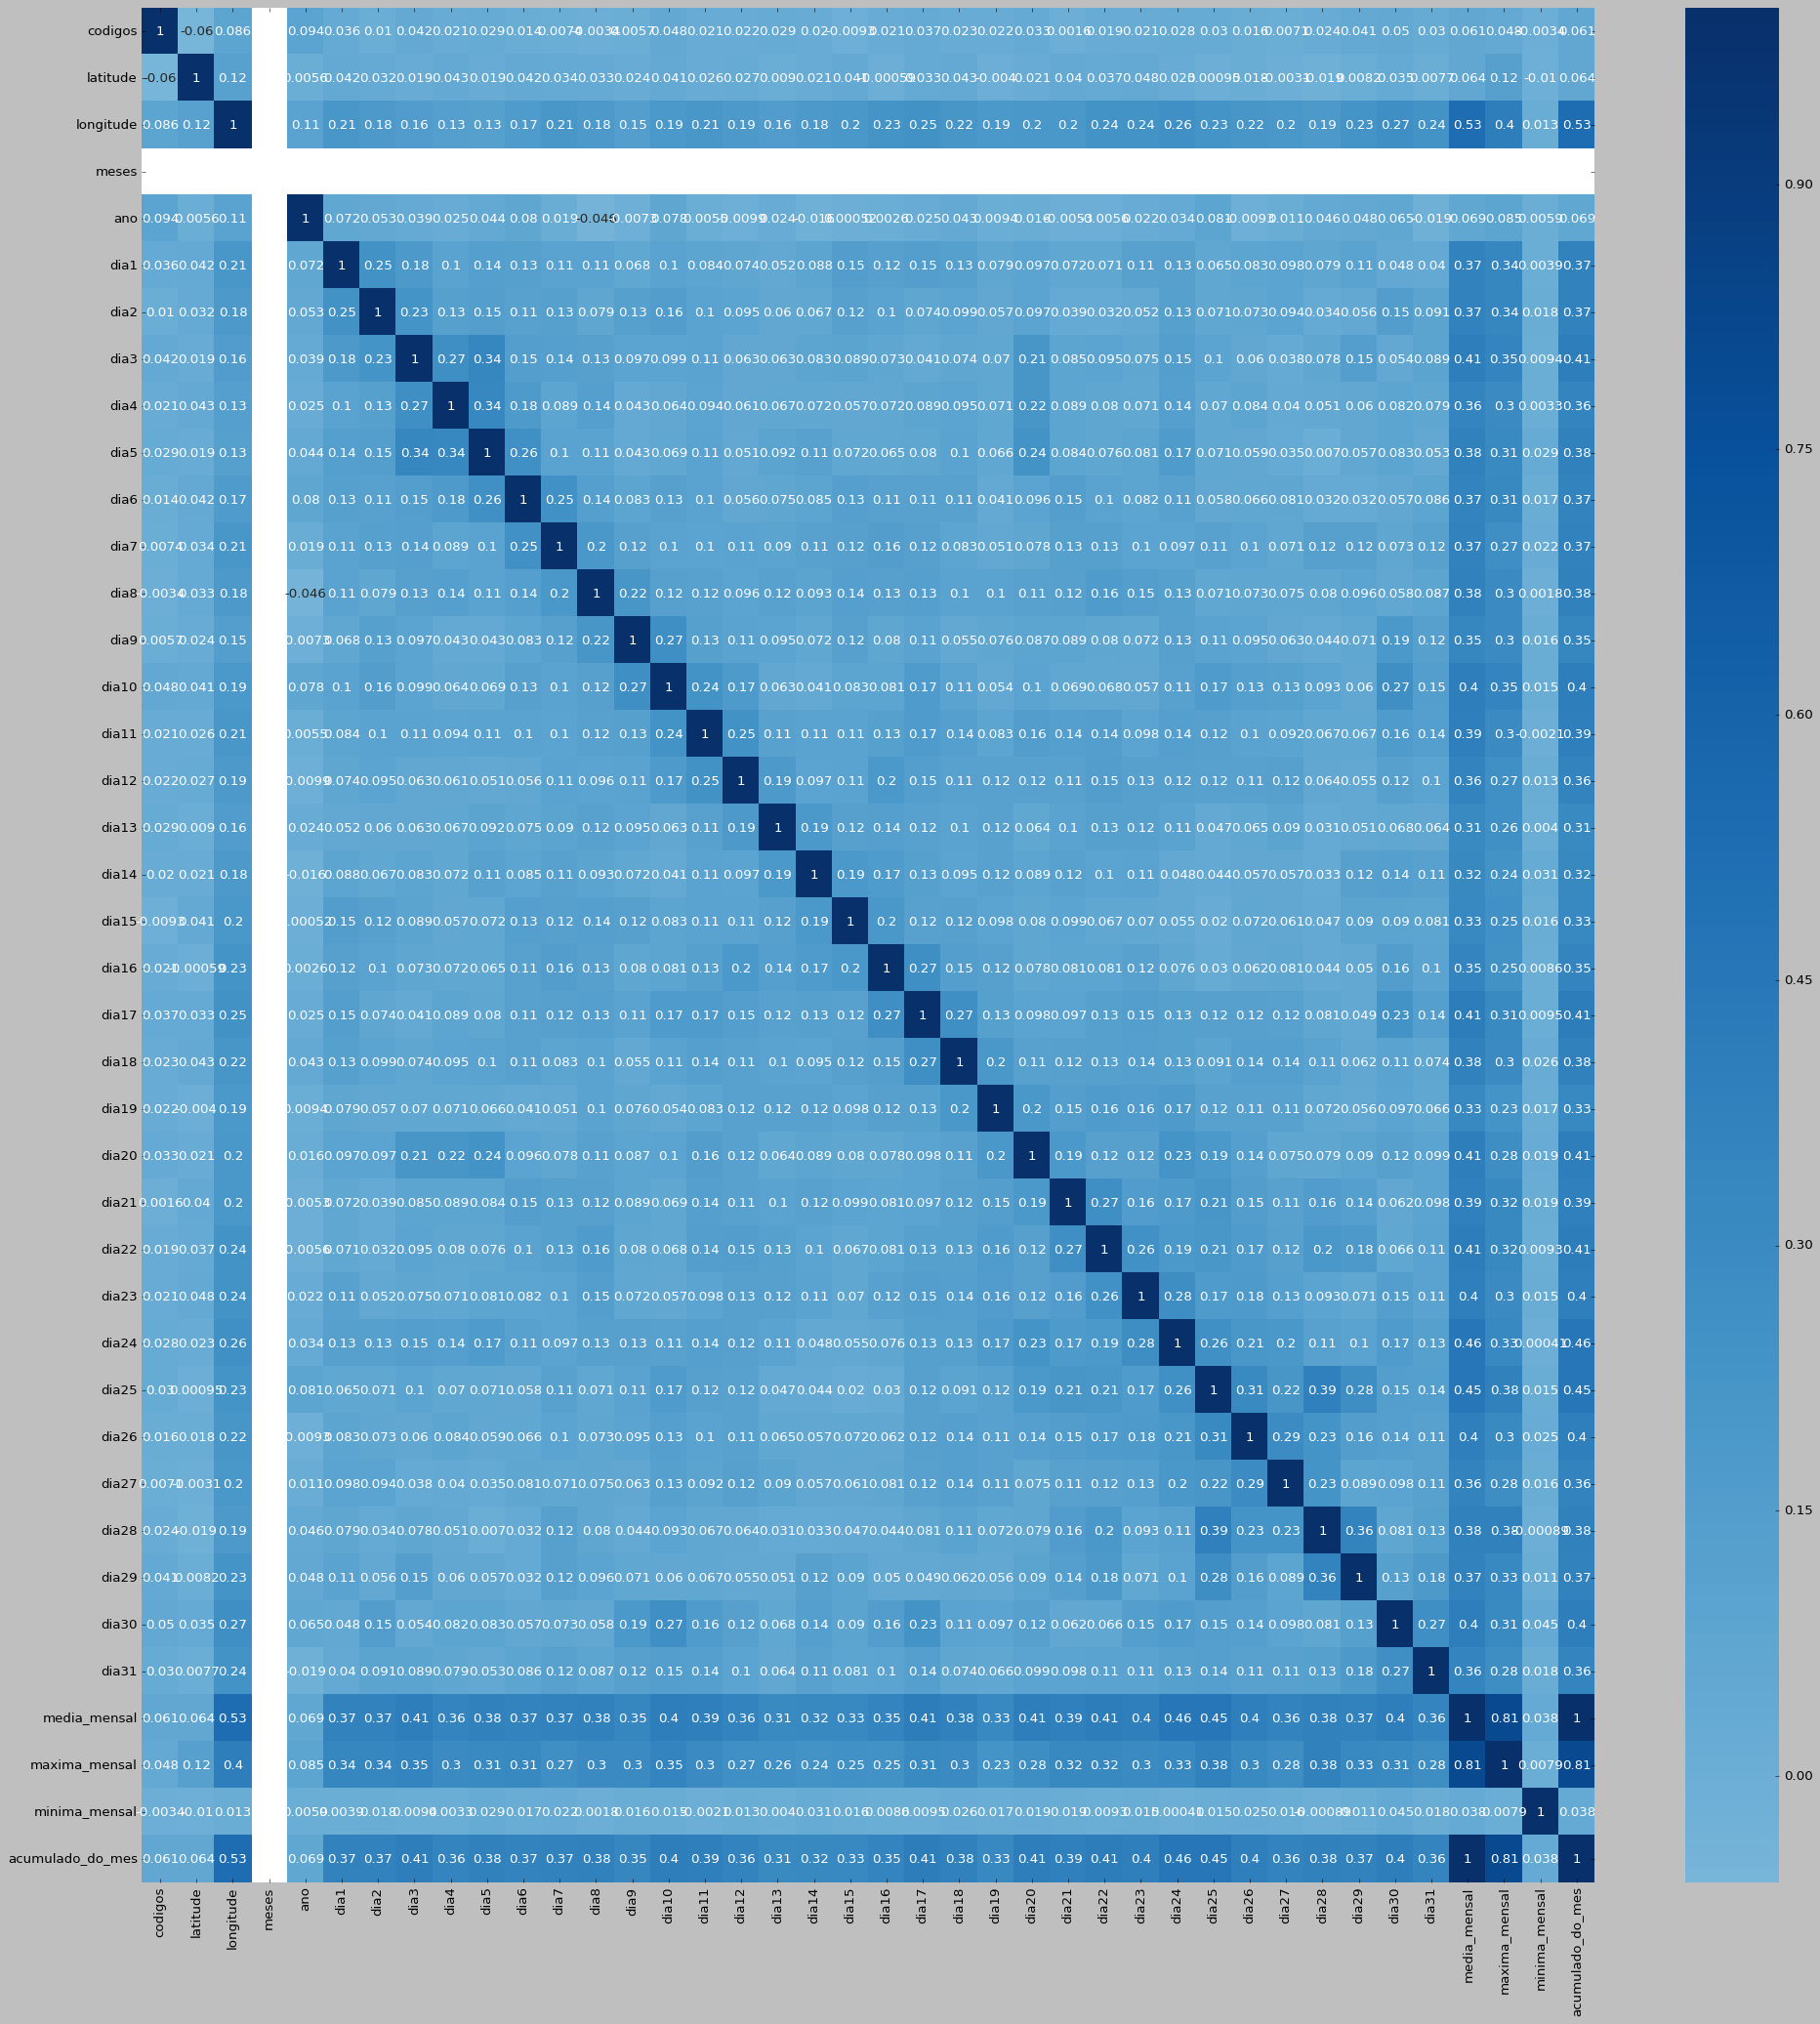

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(correlacao, cmap="Blues", center=0, annot=True)

In [ ]:
#plt.figure(figsize=(10, 10))
#sns.pairplot(dadostestes)

Normalizando os dados de fechamento

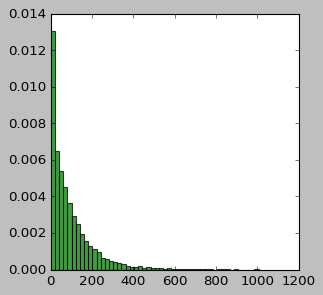

Média dos valores normalizados 3.7201681749985163
Desvio Padrão dos valores normalizados 1.706748567033768


In [ ]:
series = dados.acumulado_do_mes
plt.figure(figsize=(4,4))
plt.hist(series, 50, density=True, facecolor='g', alpha=0.75)
plt.show()
iteração = np.linspace(1,len(dados),len(dados))
percent_train = .7
divisao = int(percent_train*len(dados))
ln_series = np.log(series+1)
y_treino = ln_series[:divisao]
xm = y_treino.mean()
Sx = y_treino.std()
print("Média dos valores normalizados", xm)
print("Desvio Padrão dos valores normalizados",Sx)
series = (ln_series - xm)/Sx

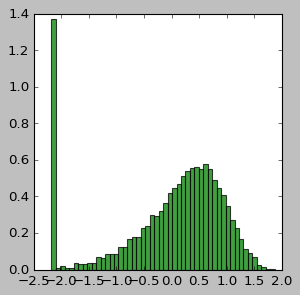

In [ ]:
plt.figure(figsize=(4,4))
plt.hist(series, 50, density=True, facecolor='g', alpha=0.75)
plt.show()

Organizando os dados

In [ ]:
entrada = ['longitude']
# saida = ['ultimo']  já que normalizamos os dados de chuva, então esses não vão ser usados
valor_entrada = dados[entrada]
#valor_saida = dados[saida]
# já que normalizamos os dados
valor_saida = series

In [ ]:
x = valor_entrada
y = valor_saida

Dividindo os dados

In [ ]:
from sklearn.model_selection import train_test_split
#qualquer valor
SEED = 0 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.30, random_state=SEED)

Aplicando a árvore de decisão

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
def regressor_arvore(nivel):
    SEED= 0
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Nivel {nivel} | Treino = {(resultados['train_score']*-1).mean()} | Teste = {(resultados['test_score']*-1).mean()}")
    treino.append((resultados['train_score']*-1).mean())
    teste.append((resultados['test_score']*-1).mean())

In [ ]:
iteracoes = []
treino = []
teste = []
for i in range(1,21):
    resultados = regressor_arvore(i)
    iteracoes.append(i)

Nivel 1 | Treino = 0.7285049910322272 | Teste = 0.7286724497937858
Nivel 2 | Treino = 0.6438338851061677 | Teste = 0.64659697111627
Nivel 3 | Treino = 0.6246821067799498 | Teste = 0.6282603596065315
Nivel 4 | Treino = 0.6153110020993362 | Teste = 0.6202874606187252
Nivel 5 | Treino = 0.6051307508605056 | Teste = 0.6126644364212539
Nivel 6 | Treino = 0.5960075603179232 | Teste = 0.6069052996583324
Nivel 7 | Treino = 0.5878912188915837 | Teste = 0.6045134125787086
Nivel 8 | Treino = 0.5802446321025881 | Teste = 0.6002333650071316
Nivel 9 | Treino = 0.5739573737652507 | Teste = 0.5984919493758548
Nivel 10 | Treino = 0.5683990345651395 | Teste = 0.5982517558295829
Nivel 11 | Treino = 0.5634488119228862 | Teste = 0.5971425990182081
Nivel 12 | Treino = 0.5590921851877966 | Teste = 0.59603967224786
Nivel 13 | Treino = 0.5557358167926769 | Teste = 0.5940142924143804
Nivel 14 | Treino = 0.5535291569676558 | Teste = 0.5926597901998981
Nivel 15 | Treino = 0.5524703478518983 | Teste = 0.5932225737

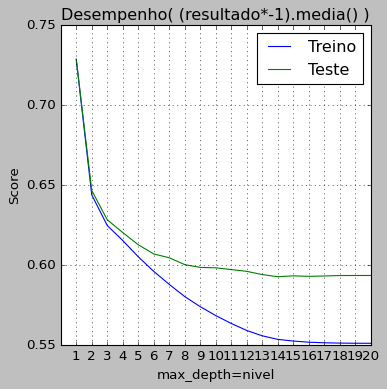

In [ ]:
plt.figure(figsize=(5,5))
plt.plot( iteracoes, treino, 'b-', color='blue', label = 'Treino')
plt.plot( iteracoes, teste, 'b-', color='green', label = 'Teste')
plt.title('Desempenho( (resultado*-1).media() )')
plt.xlabel('max_depth=nivel')
plt.ylabel('Score')
plt.legend()
plt.xticks(iteracoes)
plt.grid('True')
plt.show()

In [ ]:
def calcula_mse(resultados):
    media = (resultados["test_score"]*-1).mean()
    desvio_padrao = (resultados["test_score"]*-1).std()
    lim_inferior = media - (2*desvio_padrao)
    lim_superior = media + (2*desvio_padrao)
    print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

In [ ]:
SEED= 1232
np.random.seed(SEED)
partes = KFold(n_splits = 10, shuffle=True)
modelo_arvore = DecisionTreeRegressor(max_depth=5) # resgatar a melhor performance
modelo_arvore.fit(x_treino, y_treino) # aprende
predicoes = modelo_arvore.predict(x_teste) #prever
resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error")
calcula_mse(resultados) # para encontrar o intervalo de confiança

Intervalo de confiança 0.535867743744308 - 0.6896867341505344


NSE = 0.39323633360121835
MAE = 0.5849354576532794


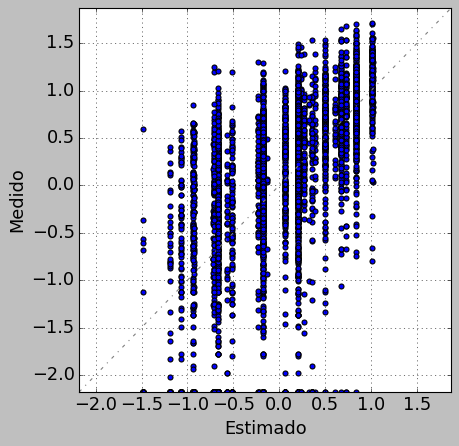

In [ ]:
#predicoes = predicoes.reshape(1404, 1)
Min = series.min()
Max = series.max()
plt.figure(figsize=(6,6))
plt.scatter(predicoes, y_teste)
plt.plot([Min,Max],[Min,Max],'-.', c = 'gray')
plt.ylim([Min,Max])
plt.xlim([Min,Max])
plt.xticks(fontsize = 16)
plt.xlabel("Estimado", fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel("Medido", fontsize = 16)
plt.grid(True)
def NSE(Yobs, Ysim):
  Yobs_m = np.mean(Yobs)
  s = np.sum((Yobs - Ysim)**2)
  i = np.sum((Yobs - Yobs_m)**2)
  return 1 - s/i
print('NSE =',NSE(y_teste, predicoes))
print('MAE =', tf.keras.metrics.mean_absolute_error(y_teste, predicoes).numpy())